# Week 3:  Ordinary Differential Equations
Yada Pruksachatkun

# 7.1) 
What is the second-order approximation error of the Heun method, which averages the slope at the beginning and the end of the interval?

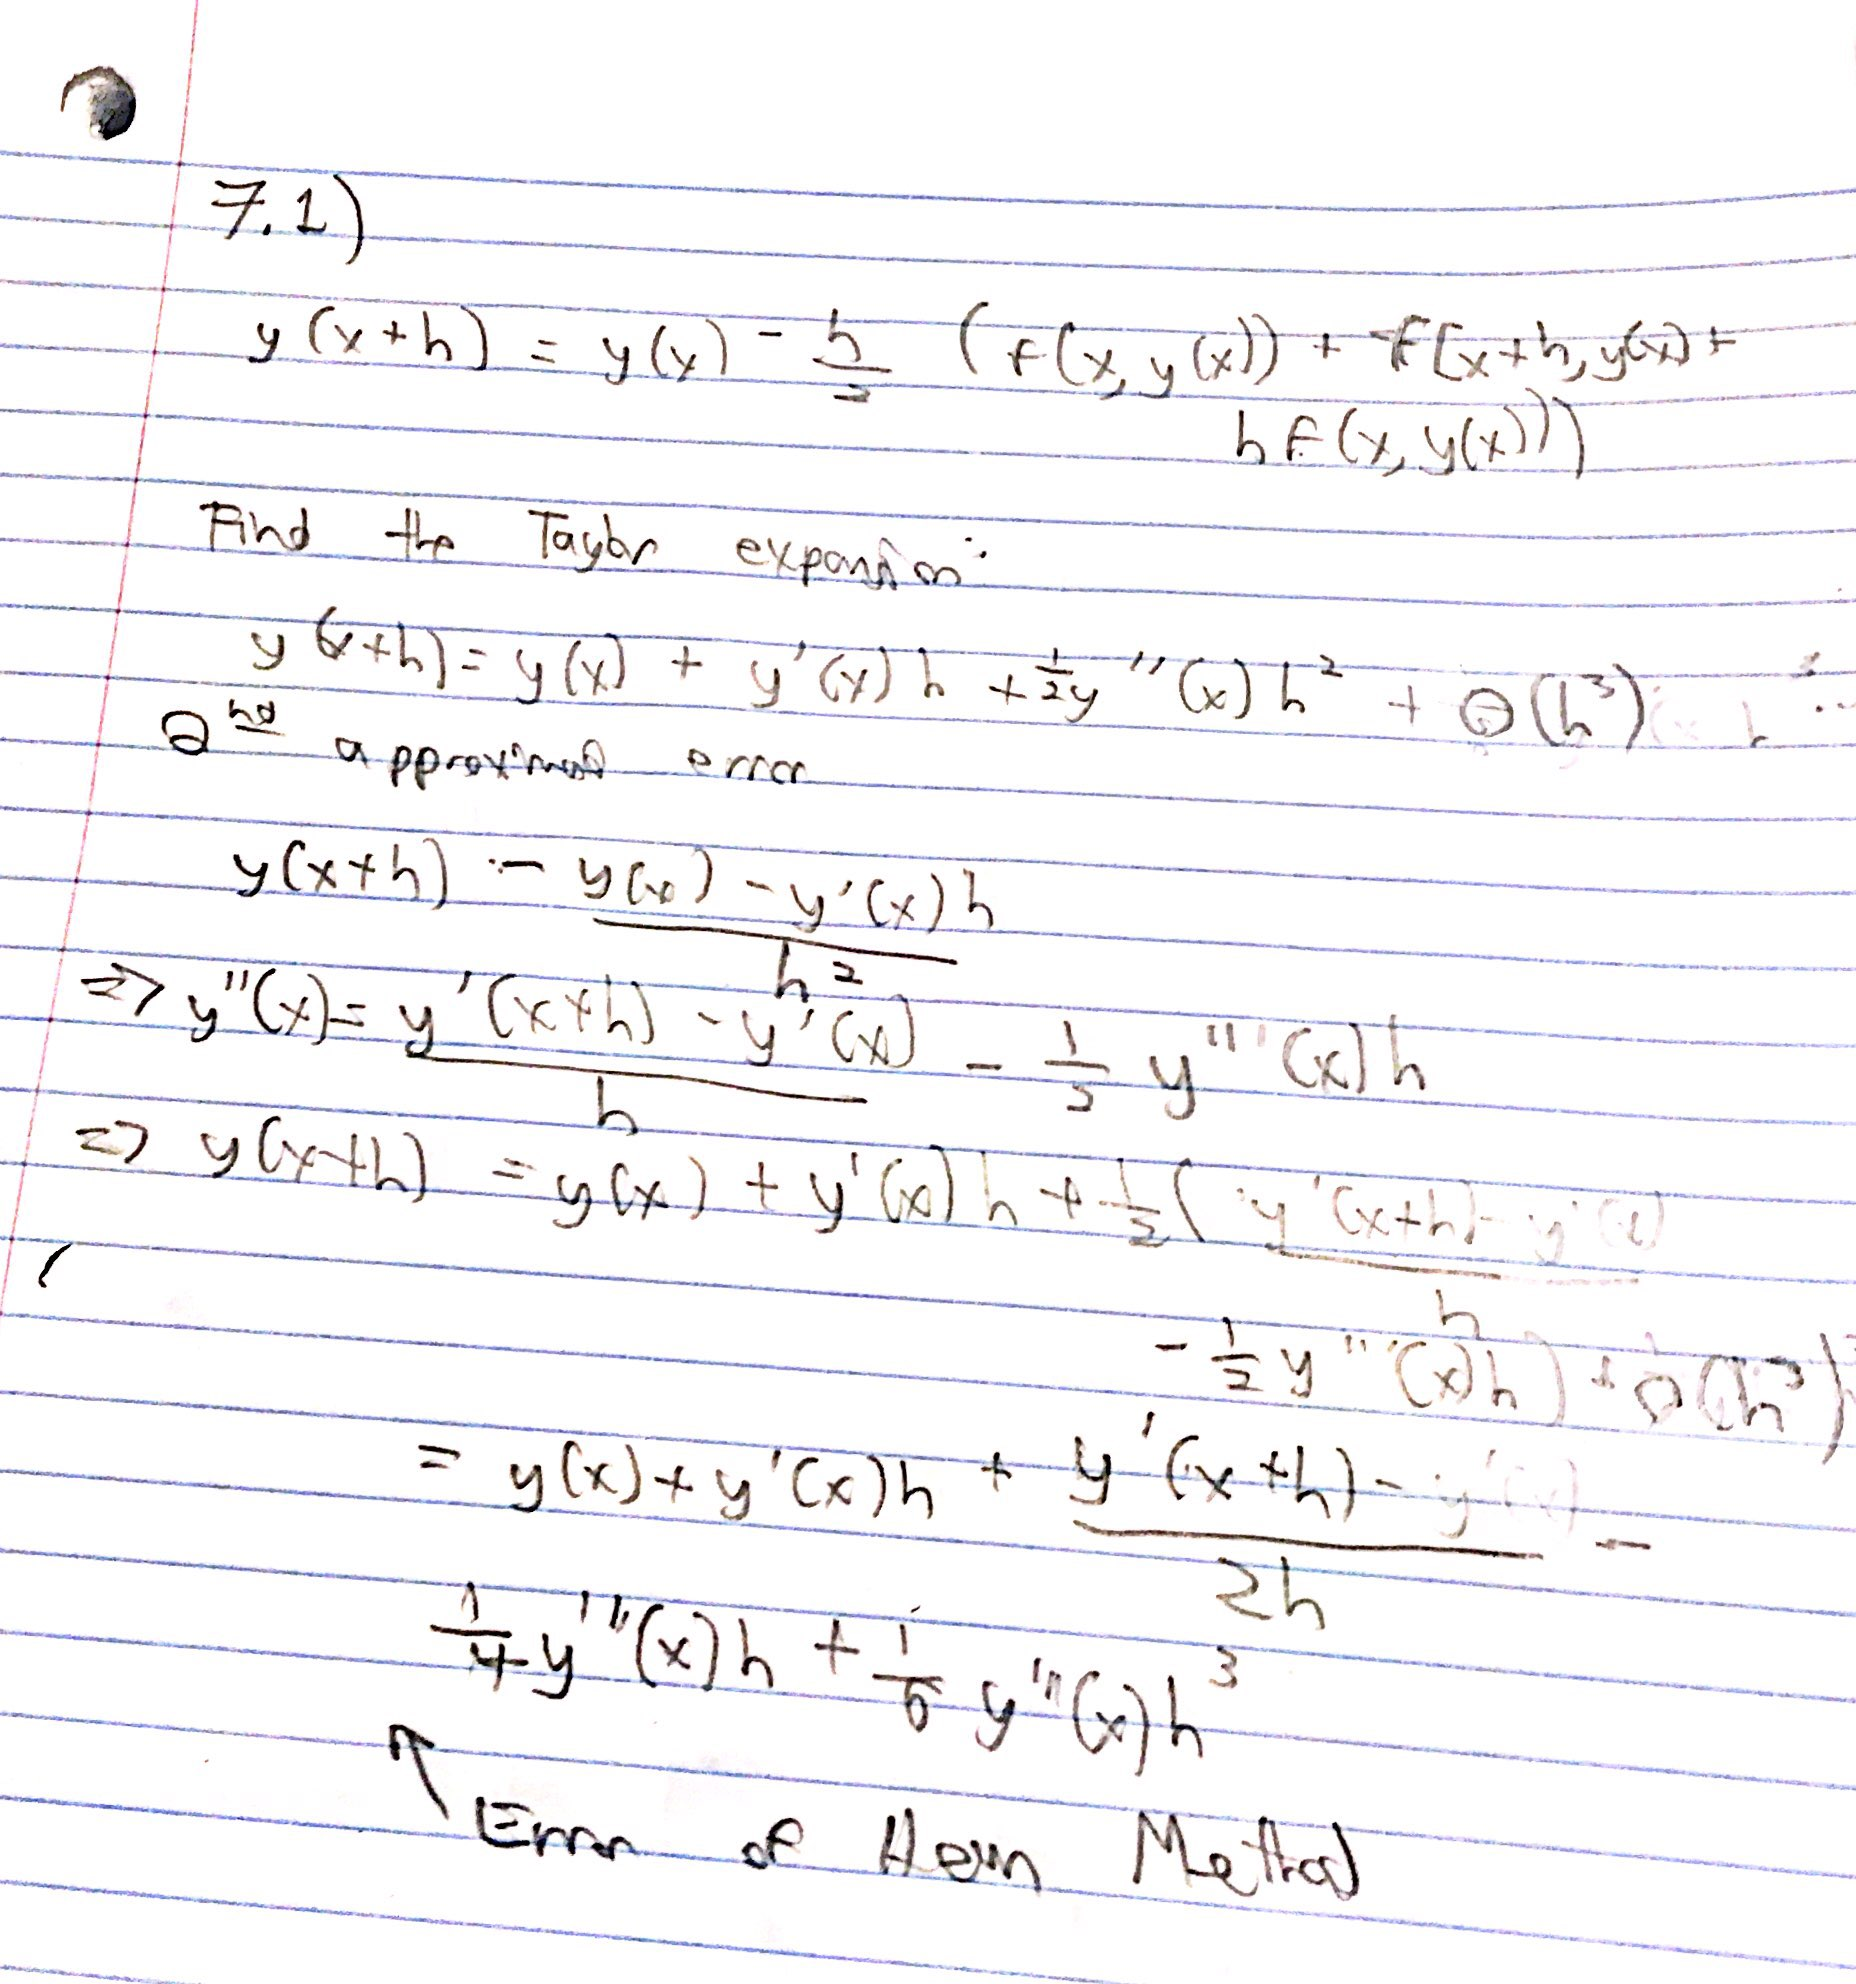

In [1]:
from IPython.display import Image
Image(filename='files/wk3prob1.jpg')

## 7.2)

####  Prompt: 
For a simple harmonic oscillator y¨+y = 0, with initial conditions y(0) = 1, y˙(0) = 0,
find y(t) from t = 0 to 100π. Use an Euler method and a fixed-step fourth-order
Runge–Kutta method. For each method check how the average local error, and the
error in the final value and slope, depend on the step size.

Euler Method

6.2 For a simple harmonic oscillator y ̈+y=0, with initial conditions y(0)=1,y ̇(0)=0,
find y(t) from t = 0 to 100π. Use an Euler method and a fixed-step fourth-order Runge–Kutta method. For each method check how the average local error, and the error in the final value and slope, depend on the step size.

First let us break down the second degree ODE into several first-degree ordinary differential equations. 

$ u = y' \\ \dot{u} = y'' = -y $

For the Euler method, I am going to take a step size of π. Here, given the lambdas for each first degree differential equation, let us write a function to solve 2nd degree equations 

To analytically derive this, 

In [36]:

def euler(t0, x0, u0, f, step_size, target):
    """Here, list_equations is the differential equations from smallest to largest.
    t0 is the first time stamp 
    x0 is the value at the timestamp t0
    y0 is the slope at timestamp t0
    y(t_n) = x_n 
    """
    curr_t = t0
    curr_x = x0
    slope = u0
    points = []
    while curr_t < target:
        curr_x = curr_x + (step_size * slope)
        slope = slope + (step_size * f(curr_t, curr_x))
        curr_t += step_size
        points.append(curr_x)
    return curr_x

def rutta_kunge(y, v, time, step_size, maximum, f):
    current_y = y
    slope = v
    while (time < maximum):
        k1 = f(time,current_y)
        k2 = f(time+step_size*0.5,current_y+k1*0.5*step_size)
        k3 = f(time+step_size*0.5,current_y+k2*0.5*step_size)
        k4 = f(time+step_size,current_y+k3*step_size)

        slope += step_size * (k1+2*k2+2*k3+k4)/6

        # v doesn't explicitly depend on other variables
        k1 = k2 = k3 = k4 = slope

        current_y += step_size * (k1+2*k2+2*k3+k4)/6
        time += step_size
        
    return current_y



# This changes a lot based on the step size.
print("Euler's method")
print(euler(0, 1, 0, f, 1, n))
print("rutta Kunge Method")
print(rutta_kunge(1, 0, 0, 1, n, f))
# The difference between a single step and two half-steps provides an estimate of the local error in the step.



Euler's method
-1
rutta Kunge Method
-1.08086267110972


7.3) Write a fourth order Runge-Kutta adaptive stepper for the preceding problem, and check how the average step size that it finds depends on the desired local error. 